### London Housing Dataset

Dataset is conferred around the housinf market of London from 1995 to 2019.

We will analyse the data using Pandas dataframe.

#### Questions to answer include 

Q. 1) Convert the Datatype of 'Date' column to Date-Time format.
Q. 2) Add a new column ''year'' in the dataframe, which contains years only.(B.2) Add a new column ''month'' as 2nd column in the dataframe, which contains month only.
Q. 3) Remove the columns 'year' and 'month' from the dataframe.
Q. 4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?
Q. 5) What is the maximum & minimum 'average_price' per year in england ?
Q. 6) What is the Maximum & Minimum No. of Crimes recorded per area ?
Q. 7) Show the total count of records of each area, where average price is less than 100000.

In [1]:
import pandas as pd

In [2]:
lh = pd.read_csv('London Housing Data.csv')

In [7]:
lh

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


Basic analysis to understand our data

In [8]:
lh.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [5]:
lh.describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


In [11]:
lh.isnull()

,date,area,average_price,code,houses_sold,no_of_crimes
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
13544,False,False,False,False,False,True
13545,False,False,False,False,False,True
13546,False,False,False,False,False,True
13547,False,False,False,False,True,True


In [6]:
lh.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [10]:
lh.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [13]:
lh.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

In [14]:
# Importing libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt


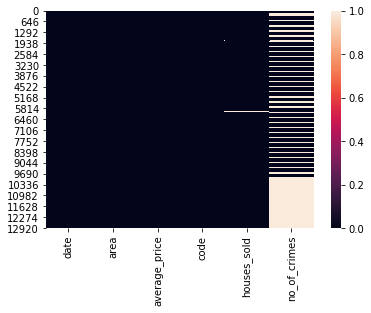

In [16]:
# heatmap of null values

sns.heatmap(lh.isnull());

The white color shows the presence of null values in the column

### Q. 1) Convert the Datatype of 'Date' column to Date-Time format.

In [18]:
lh['date']=pd.to_datetime(lh['date'])

# or lh.date = pd.to_datetime(date,date)

In [21]:
print(lh['date'])

0       1995-01-01
1       1995-02-01
2       1995-03-01
3       1995-04-01
4       1995-05-01
           ...    
13544   2019-09-01
13545   2019-10-01
13546   2019-11-01
13547   2019-12-01
13548   2020-01-01
Name: date, Length: 13549, dtype: datetime64[ns]


### Q. 2) Add a new column ''year'' in the dataframe, which contains years only.

### (B.2) Add a new column ''month'' as 2nd column in the dataframe, which contains month only. 

In [27]:
lh['year'] = lh['date'].dt.year

In [28]:
lh.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


In [30]:
lh.insert(1, 'month', lh['date'].dt.month)

In [31]:
lh.head(2)

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995


### Q. 3) Remove the columns 'year' and 'month' from the dataframe. 

we will use the drop method to remove the columns 'year' and 'month' from the dataframe by passing a list of column names to be removed as the first argument, and axis=1 as the second argument to specify that we want to drop columns (as opposed to rows).

In [32]:
# To remove the columns 'year' and 'month' from a dataframe in Python, you can use the drop method from the pandas library.
lh = lh.drop(['year', 'month'], axis=1)

In [33]:
lh.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


### Q. 4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ? 

In [37]:
# filter the dataframe to show only the records where 'No. of Crimes' is 0
lh[lh['no_of_crimes'] == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [39]:
lh[lh['no_of_crimes'] == 0].count()

date             104
area             104
average_price    104
code             104
houses_sold      104
no_of_crimes     104
dtype: int64

In [40]:
lh_zero = lh[lh['no_of_crimes'] == 0]

In [42]:
count = lh_zero['no_of_crimes'].count()
print(count)

104


### Q. 5) What is the maximum & minimum 'average_price' per year in england ? 

In [44]:
lh.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [45]:
lh['average_price'].max()

1463378

In [46]:
lh['average_price'].min()

40722

### Q. 6) What is the Maximum & Minimum No. of Crimes recorded per area ? 

In [51]:
lh.groupby('area')['no_of_crimes'].max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

In [52]:
lh.groupby('area')['no_of_crimes'].min()

area
barking and dagenham      1217.0
barnet                    1703.0
bexley                     860.0
brent                     1850.0
bromley                   1441.0
camden                    2079.0
city of london               0.0
croydon                   2031.0
ealing                    1871.0
east midlands                NaN
east of england              NaN
enfield                   1635.0
england                      NaN
greenwich                 1513.0
hackney                   1870.0
hammersmith and fulham    1323.0
haringey                  1536.0
harrow                     937.0
havering                  1130.0
hillingdon                1445.0
hounslow                  1529.0
inner london                 NaN
islington                 1871.0
kensington and chelsea    1347.0
kingston upon thames       692.0
lambeth                   2381.0
lewisham                  1675.0
london                       NaN
merton                     819.0
newham                    2130.0
north

### Q. 7) Show the total count of records of each area, where average price is less than 100000.

To show the total count of records of each area where the average price is less than 100000, we will use the groupby function from the pandas library in combination with the count and mean functions. 

In [53]:
lh.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [57]:
# filter the rows where the average price is less than 100000
lh[lh['average_price']< 100000]

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13330,2001-11-01,england,95083,E92000001,109149.0,NaN
13331,2001-12-01,england,95992,E92000001,93329.0,NaN
13332,2002-01-01,england,96215,E92000001,71678.0,NaN
13333,2002-02-01,england,96676,E92000001,77131.0,NaN


In [58]:
lh[lh['average_price']< 100000].count()

date             2209
area             2209
average_price    2209
code             2209
houses_sold      2205
no_of_crimes       13
dtype: int64